In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
datasets = [
    "Gaublomme_GSE75109_TPM_clean",
    "Gaublomme_GSE75110_TPM_clean",
    "Gaublomme_GSE75111_TPM_clean",
    "kakadarov_tpm",
    "somatosensory_converted_into_tpm",
    "Dopaminergic_TPM_clean",
    "Rbp4_positive_cells",
    "Cheng_ES_TPM",
    "Alveolar_cells_Type_II_Merged_Batches",
    "Alveolar_cells_Type_I_Merged_Batches",
#     "Alveolar_cells_both_types",
    "klein",
    "hepat_TPM_yang_clean",
    "Yu_First_wave_endocrine_cells",
]

families = "clean_panther4march"

dfs = {x: pd.read_csv("{}/{}/results/family_IC.csv".format(x, families), index_col="family_id") for x in datasets}
dichotomised_dfs = {x: pd.read_csv("{}/{}/intermediate/dichotomised_genes.csv".format(x, families), index_col="gene_id") for x in datasets}

In [3]:
cell_type_names = {
    "somatosensory_converted_into_tpm": "Somatosensory N",
    "Dopaminergic_TPM_clean": "Dopaminergic N",
    "kakadarov_tpm": "CD8+ T cell",
    "Cheng_ES_TPM": "Isolated ESC",
    "Gaublomme_GSE75109_TPM_clean": "Th17 A",
    "Gaublomme_GSE75110_TPM_clean": "Th17 B",
    "Gaublomme_GSE75111_TPM_clean": "Th17 C",
    "Rbp4_positive_cells": "Corticostriatal N",
    "Alveolar_cells_Type_I_Merged_Batches": "Lung ACI",
    "Alveolar_cells_Type_II_Merged_Batches": "Lung ACII",
#     "Alveolar_cells_both_types",
    "klein": "Cultured ESC",
    "hepat_TPM_yang_clean": "Liver HB/HC",
    "Yu_First_wave_endocrine_cells": "Pancreatic EC",
}

In [4]:
family_df = pd.read_csv("{}.csv".format(families))

In [5]:
df = dfs["Gaublomme_GSE75109_TPM_clean"]
df.loc["PTHR23430"]

family_size        30.000000
n_genes            30.000000
obs_var            14.202586
pb_var              2.639511
ic                  5.380763
mean_expression     5.424460
Name: PTHR23430, dtype: float64

In [158]:
_x = None
def plot_heatmaps(k, k_name, v, font_scale=1.4):
    sns.set(font_scale=font_scale, style="ticks", font="Arial")
    base = 5.2
    basey = 0.22
    def get_L(dataset):
        dichotomised_df = dichotomised_dfs[dataset]
        x = dichotomised_df.loc[family_df[family_df.family_id == k].gene_symbol].dropna().copy()#.T.describe()
        x = x[x.sum(axis=1) > 0]
        return x.shape[0]
    print([get_L(x) for x in v], max([get_L(x) for x in v]))
    l_y = basey * max([get_L(x) for x in v])
    
    l = base*len(v) if len(v) > 1 else base * 0.9
    fig, axs = plt.subplots(1,len(v), figsize=(l,l_y))
    fig_hist, axs_hist = plt.subplots(1,len(v), figsize=(l,base))
    if len(v) == 1:
        axs = [axs]
        axs_hist = [axs_hist]
    for i, dataset in enumerate(v):
        df = dfs[dataset]
        dichotomised_df = dichotomised_dfs[dataset]
        x = dichotomised_df.loc[family_df[family_df.family_id == k].gene_symbol].dropna().copy()#.T.describe()
        x = x[x.sum(axis=1) > 0]
        
        print(dataset,"Mean ON-cell TPM:",x.mean().mean())
        exp_per_cell = x.sum(axis=0)
        
        x = x.loc[:, x.sum(axis=0).sort_values().index]
        def get_first_index(row):
            for i in range(len(row)):
                if row.iloc[i] == 1.0:
                    return i
            return len(row)

        x = x.loc[x.apply(get_first_index, axis=1).sort_values().index, :]
        sns.heatmap(x,ax=axs[i],xticklabels=False,yticklabels=True, cbar=False, cmap="gray_r", vmin=-0.03, vmax=1.0)#, linewidth=0.1, linecolor="grey")
#         sns.heatmap(x.loc[x.sum(axis=1).sort_values().index, x.sum(axis=0).sort_values().index],ax=axs[1,i])
        sns.distplot(exp_per_cell, kde=False, ax=axs_hist[i], hist_kws={"range": [exp_per_cell.min()-0.5, exp_per_cell.max()+0.5]}, bins=int(exp_per_cell.max() - exp_per_cell.min() + 1), color="grey")
        axs[i].title.set_text("{} (IC={:.2f})".format(cell_type_names[dataset], df.loc[k].ic))
#         axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=45)
        axs[i].set_ylabel("")
        axs_hist[i].set_xlabel("Number of ON genes")
        axs_hist[i].title.set_text("{} (IC={:.2f})".format(cell_type_names[dataset], df.loc[k].ic))
    fig.subplots_adjust(wspace=0.4)
    return x
#     plt.show()
#     return summary_rows

In [148]:
def get_genes(k, dataset):
    dichotomised_df = dichotomised_dfs[dataset]
    x = dichotomised_df.loc[family_df[family_df.family_id == k].gene_symbol].dropna().copy()#.T.describe()
    x = x[x.sum(axis=1) > 0]
    
    x = x.loc[:, x.sum(axis=0).sort_values().index]
    def get_first_index(row):
        for i in range(len(row)):
            if row.iloc[i] == 1.0:
                return i
        return len(row)

    x = x.loc[x.apply(get_first_index, axis=1).sort_values().index, :]
    
    return x

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


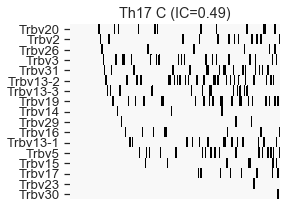

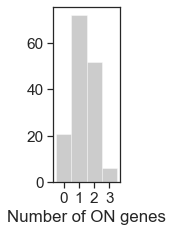

In [135]:
x = get_genes("PTHR23268", "Gaublomme_GSE75111_TPM_clean")

sns.set(font_scale=1.2, style="ticks", font="Arial")
plt.figure(figsize=(4.2*0.9, x.shape[0]*0.19))
sns.heatmap(x, xticklabels=False,yticklabels=True, cbar=False, cmap="gray_r", vmin=-0.03, vmax=1.0)#, linewidth=0.1, linecolor="grey")
ic = dfs["Gaublomme_GSE75111_TPM_clean"].loc["PTHR23268"].ic
plt.title("{} (IC={:.2f})".format(cell_type_names["Gaublomme_GSE75111_TPM_clean"], ic))
plt.ylabel("")
plt.show()

sns.set(font_scale=1.4, style="ticks", font="Arial")
plt.figure(figsize=(1.2, x.shape[0]*0.19))
exp_per_cell = x.sum(axis=0)
sns.distplot(exp_per_cell, kde=False, hist_kws={"range": [exp_per_cell.min()-0.5, exp_per_cell.max()+0.5]}, bins=int(exp_per_cell.max() - exp_per_cell.min() + 1), color="grey")
plt.xlabel("Number of ON genes")
plt.xticks(list(range(0,4)))
plt.show()

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


[18, 13] 18
Gaublomme_GSE75111_TPM_clean Mean ON-cell TPM: 0.31824871228844764
hepat_TPM_yang_clean Mean ON-cell TPM: 0.3456090651558078


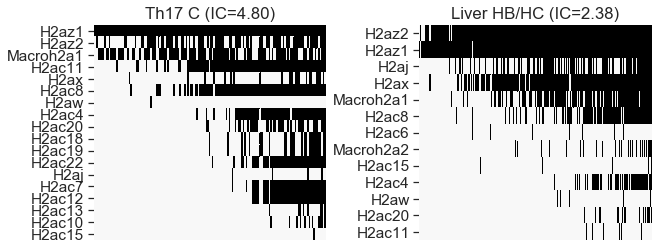

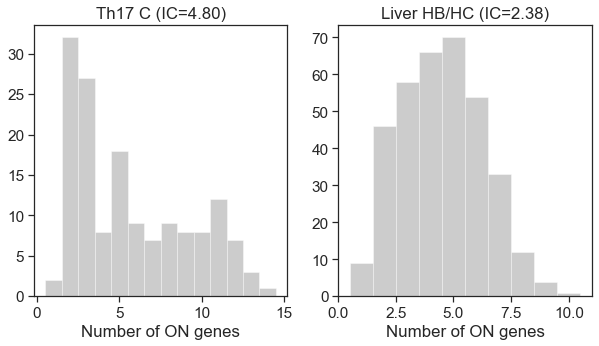

In [149]:
x = plot_heatmaps("PTHR23430", "HISTONE H2A (PTHR23430)", ["Gaublomme_GSE75111_TPM_clean", "hepat_TPM_yang_clean"])

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


[17] 17
Gaublomme_GSE75111_TPM_clean Mean ON-cell TPM: 0.07557460070120747


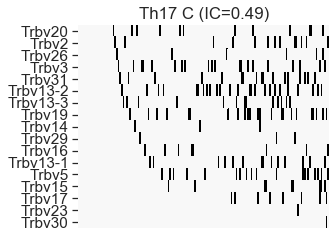

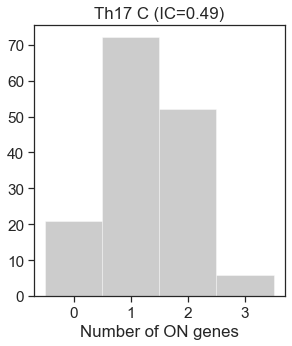

In [150]:
x = plot_heatmaps("PTHR23268", "T-CELL RECEPTOR BETA CHAIN (PTHR23268)", ["Gaublomme_GSE75111_TPM_clean"])

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


[7, 9, 9] 9
Gaublomme_GSE75111_TPM_clean Mean ON-cell TPM: 0.09460737937559126
somatosensory_converted_into_tpm Mean ON-cell TPM: 0.21187363834422637
hepat_TPM_yang_clean Mean ON-cell TPM: 0.23197985520931755


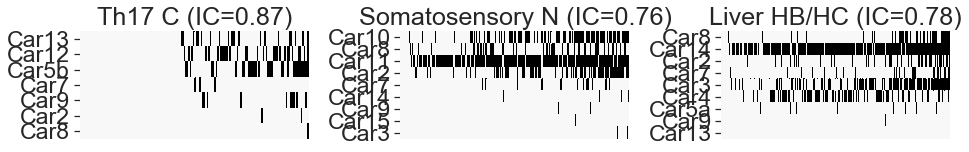

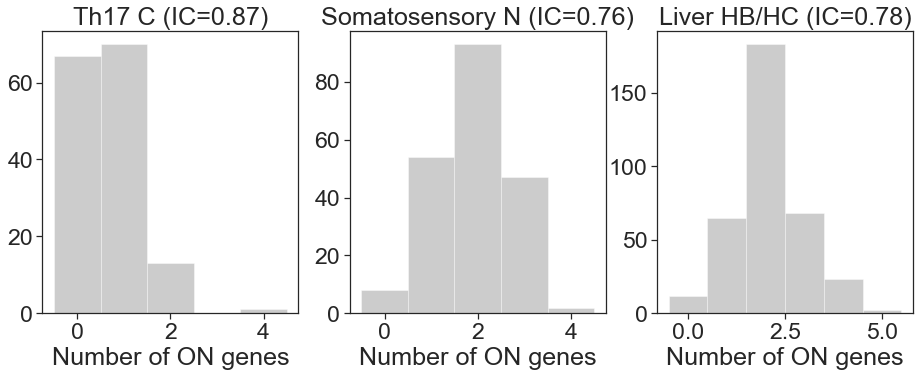

In [160]:
x = plot_heatmaps("PTHR18952", "CARBONIC ANHYDRASE (PTHR18952)", ["Gaublomme_GSE75111_TPM_clean", "somatosensory_converted_into_tpm", "hepat_TPM_yang_clean"], 2.1)

In [140]:
def get_first_index(row):
    for i in range(len(row)):
        if row.iloc[i] == 1.0:
            return i
    return len(row)

x.apply(get_first_index, axis=1)

gene_id
Car8      12
Car14     13
Car2      14
Car7      15
Car3      16
Car4      35
Car5a     61
Car9     254
Car13    307
dtype: int64

[5, 5] 5
Cheng_ES_TPM Mean ON-cell TPM: 0.33700696055683854
Yu_First_wave_endocrine_cells Mean ON-cell TPM: 0.24474885844749025


,Ngn3Pos_E17.5_4_29,Ngn3Pos_E16.5_3_15,Ngn3Pos_E17.5_3_06,Ngn3Pos_E16.5_3_37,Ngn3Pos_E17.5_2_27,Ngn3Pos_E12.5_3_13,Ngn3Pos_E17.5_2_23,Ngn3Pos_E17.5_2_13,Ngn3Pos_E16.5_4_09,Ngn3Pos_E12.5_1_15,...,Ngn3Pos_E10.5_2_07,Ngn3Pos_E10.5_2_08,Ngn3Pos_E10.5_2_15,Ngn3Pos_E10.5_3_07,Ngn3Pos_E12.5_2_05,Ngn3Pos_E10.5_3_01,Ngn3Pos_E12.5_1_31,Ngn3Pos_E10.5_3_08,Ngn3Pos_E17.5_1_05,Ngn3Pos_E10.5_3_18
gene_id,,,,,,,,,,,,,,,,,,,,,
Hk2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Gck,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
Hkdc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Hk1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Hk3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


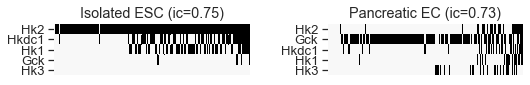

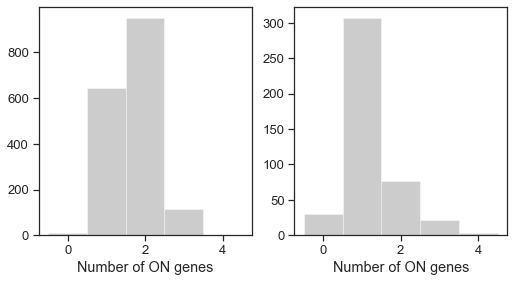

In [80]:
plot_heatmaps("PTHR19443", "HEXOKINASE (PTHR19443)", ["Cheng_ES_TPM", "Yu_First_wave_endocrine_cells"])